### 이진_다중 분류 모델_KNN
- 데이터 : iris.csv
- 3개 품종 중 1개 선택 => 예) Setosa 와 Others  : 2진분류 진행 
- 3개 품종 다중 분류 진행
- scale 전후 모델 성능 비교
- 최적 K 찾기

### Iris : 붓꽃
- sepal.length : 
- sepal.width  : 
- petal.length : 
- petal.width  : 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import koreanize_matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
DATA_FILE = '../Data/iris.csv'

irisDF = pd.read_csv(DATA_FILE)

[2] 데이터 확인 및 전처리 <hr>

In [34]:
# [2-1] 데이터 확인
display( irisDF.head(3) )
irisDF.info()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
irisDF.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


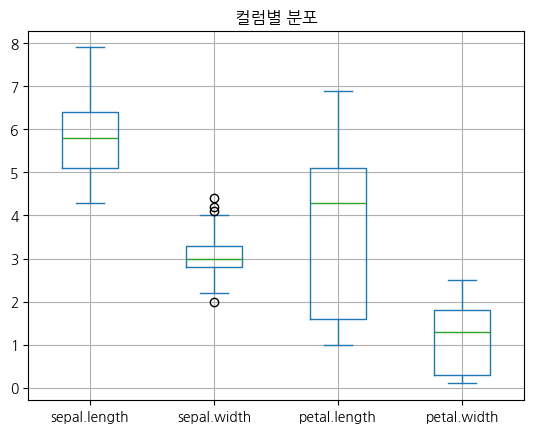

In [36]:
irisDF.isnull().sum()  ## => 0개

irisDF.duplicated().sum()  ## => 1개
irisDF = irisDF.drop_duplicates()
irisDF.duplicated().sum()  ## => 0개 (제거 완료)

irisDF.plot(kind='box', title='컬럼별 분포', grid=True)
plt.show()

In [37]:
# [2-2] 데이터 타입
pd.options.mode.copy_on_write = True

irisDF.variety = irisDF.variety.astype('category')
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  149 non-null    float64 
 1   sepal.width   149 non-null    float64 
 2   petal.length  149 non-null    float64 
 3   petal.width   149 non-null    float64 
 4   variety       149 non-null    category
dtypes: category(1), float64(4)
memory usage: 6.1 KB


In [51]:
irisDF.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.118129,0.873738,0.820620
sepal.width,-0.118129,1.000000,-0.426028,-0.362894
petal.length,0.873738,-0.426028,1.000000,0.962772
petal.width,0.820620,-0.362894,0.962772,1.000000


[3] 학습관련 전처리 및 준비 <hr>

In [ ]:
## [3-1] 피쳐와 타겟 분리
featureDF = irisDF[irisDF.columns[[0,2,3]]] # 이상치 많고 상관계수 낮은 1열은 빼기
targetSR = irisDF[irisDF.columns[-1]]

print(f'featureDF => {featureDF.shape} / {featureDF.ndim}D')
print(f'targetSR => {targetSR.shape} / {targetSR.ndim}D')

featureDF => (149, 3) / 2D
targetSR => (149,) / 1D


In [39]:
## [3-2] 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=targetSR)

In [40]:
## 학습용, 테스트용 데이터 개수
print(f'[학습용] {x_train.shape} {x_train.ndim}D, {y_train.shape} {y_train.ndim}D')
print(f'[테스트용] {x_test.shape} {x_test.ndim}D, {y_test.shape} {y_test.ndim}D')

## 3개 라벨/클래스 Setosa, Versicolor, Virginica 비율
targetL = (targetSR.value_counts()/targetSR.shape[0]).to_list()
trainL = (y_train.value_counts()/y_train.shape[0]).to_list()
testL = (y_test.value_counts()/y_test.shape[0]).to_list()

print(f'[Target] Setosa : Versicolor : Virginica = {targetL[0]:.3f} : {targetL[1]:.3f} : {targetL[2]:.3f}')
print(f'[Train]  Setosa : Versicolor : Virginica = {trainL[0]:.3f} : {trainL[1]:.3f} : {trainL[2]:.3f}')
print(f'[Test]   Setosa : Versicolor : Virginica = {testL[0]:.3f} : {testL[1]:.3f} : {testL[2]:.3f}')

[학습용] (119, 3) 2D, (119,) 1D
[테스트용] (30, 3) 2D, (30,) 1D
[Target] Setosa : Versicolor : Virginica = 0.336 : 0.336 : 0.329
[Train]  Setosa : Versicolor : Virginica = 0.336 : 0.336 : 0.328
[Test]   Setosa : Versicolor : Virginica = 0.333 : 0.333 : 0.333


In [41]:
## [3-3] 수치형 피쳐들 스케일 조정 : 스케일러 생성
stdScaler = StandardScaler()
stdScaler.fit(x_train)

s_x_train = stdScaler.transform(x_train)
s_x_test = stdScaler.transform(x_test)

In [47]:
## -------------------------------------------
## [4-0] 최적의 K값 찾기 
## -------------------------------------------
## 훈련용/테스트용 성능 저장
scoreDict = {'Train':[], 'Test':[]}

## 최근접 이웃수 n_neighbors 범위 : 1 ≤ ~ ≤ √데이터수
MAX_K = 31

## 최적 성능의 k 즉, n_neighbors 찾기
for k  in range(1, MAX_K):
    ##- 모델 인스턴스 생성
    kModel = KNeighborsClassifier(n_neighbors=k) 
   
    ##- 모델 학습 : 학습용 데이터셋
    kModel.fit(s_x_train, y_train)

    ##- 모델 성능평가 : 테스트용 데이터셋
    train_score = kModel.score(s_x_train, y_train)
    test_score  = kModel.score(s_x_test, y_test)
    print(f'[n_neighbors-{k}]  train_score : {train_score:.6f}, test_score : {test_score:.6f}')

    ##- 학습과 테스트 성능비교 위한 저장 
    scoreDict['Train'].append(train_score)
    scoreDict['Test'].append(test_score)

[n_neighbors-1]  train_score : 1.000000, test_score : 0.966667
[n_neighbors-2]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-3]  train_score : 0.957983, test_score : 1.000000
[n_neighbors-4]  train_score : 0.966387, test_score : 0.933333
[n_neighbors-5]  train_score : 0.974790, test_score : 0.933333
[n_neighbors-6]  train_score : 0.974790, test_score : 0.933333
[n_neighbors-7]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-8]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-9]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-10]  train_score : 0.957983, test_score : 0.966667
[n_neighbors-11]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-12]  train_score : 0.966387, test_score : 0.966667
[n_neighbors-13]  train_score : 0.966387, test_score : 0.933333
[n_neighbors-14]  train_score : 0.966387, test_score : 0.933333
[n_neighbors-15]  train_score : 0.957983, test_score : 0.966667
[n_neighbors-16]  train_score : 0.974790, test_sc

In [43]:
scores = pd.DataFrame(scoreDict)
scores['diff'] = (scores['Train'] - scores['Test']).abs()
scores.sort_values(by='diff').head()

,Train,Test,diff
5,0.966387,0.966667,0.00028
6,0.966387,0.966667,0.00028
4,0.966387,0.966667,0.00028
8,0.966387,0.966667,0.00028
15,0.966387,0.966667,0.00028


In [48]:
## [4-1] 모델 인스턴스 생성
kModel = KNeighborsClassifier(n_neighbors=3)
kModel

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
## [4-2] 학습 진행
kModel.fit(s_x_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[5] 성능평가 <hr>
- 학습용, 테스트용 성능 비교

In [50]:
## .score(2D_피쳐, 1D_타겟)
train_score = kModel.score(s_x_train, y_train)
test_score  = kModel.score(s_x_test, y_test)

print(f'[성능비교]\n*학습 점수 : {train_score}   *테스트 점수 : {test_score}')

[성능비교]
*학습 점수 : 0.957983193277311   *테스트 점수 : 1.0


[6] 일반적인 데이터 예측 서비스<hr>

In [ ]:
## 꽃의 